## Scikit-Learn Exercise (Practice)

In [44]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

___
### End-to-end Scikit-Learn classification workflow
1. Get dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions

#### 1. Getting a dataset ready

In [45]:
# Import heart_disease dataset and save it to a variable
heart_disease = pd.read_csv('data/heart-disease.csv')

# View first 5 rows
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We want to build a machine learning model on all columns except `target` to predict `target`.
* **target variable** (also called y or labels) = `target` column
* **independent variables** = all other columns

Since our target is going to be heart disease or not, we know this is a **classification** problem.
* **Classification** --> if target variable is one thing or another (heart disease or not)
* **Regression** --> if target column is a numeric value (Price)

Knowing this, let's create `x` and `y` by splitting up our dataframe.

In [46]:
# Create X (all columns except target)
X = heart_disease.drop('target', axis=1) # (label name, corresponding axis)

# Create y (only the target column)
y = heart_disease['target']

Use Scikit-Learn to split into training and test setss.

In [47]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Setup a NumPy random seed equal to 42
np.random.seed(42)

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y) # default test size is 0.25

In [48]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

>Note: The default `test_size` in `train_test_split()` is 0.25; meaning, the test dataset is 25% of the total, while the training dataset is 75%.

Now, we can build a machine learning model to fit patternd in the training data and then make predictions on the test data.

To figure out which machine learning model to use, you can refer to [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

Let's say you decide to use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)...

#### 2. Preparing a machine learning model

In [49]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

Now that we have a `RandomForestClassifier` instance, we can fit the training data and make predictions on our test data.

What is an instance?

An instance, in object-oriented programming (OOP), is a specific realization of any object. An object may be varied in a number of ways. Each realized variation of that object is an instance. The creation of a realized instance is called instantiation.

Each time a program runs, it is an instance of that program. In languages that create objects from classes, an object is an instantiation of a class. That is, it is a member of a given class that has specified values rather than variables. In a non-programming context, you could think of "dog" as a class and your particular dog as an instance of that class.

#### 3. Fitting a model and making predictions

In [50]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Use the fitted model to make predictions on the test data
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

#### 4. Evaluating a models predictions

We can check our model by calling the `score()` method and passing it the training and testing data.

In [52]:
# Evaluate the fitted model on the training set using the score() function.
clf.score(X_train, y_train)

1.0

In [53]:
# Evaluate the fitted model on the test set using the score() function.
clf.score(X_test, y_test)

0.8289473684210527

___
### Experimenting with different classification models

Let's try a series of different machine learning models and see which gets the best results on our dataset.

Classification models from [Scikit-Learns machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html):
* [LinearSVC](https://scikit-learn.org/stable/modules/svm.html#classification)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html)(also known as K-Nearest Neighbors or KNN)
* [SVC](https://scikit-learn.org/stable/modules/svm.html#classification) (also known as support vector classifier, a form of [support vector machine](https://en.wikipedia.org/wiki/Support-vector_machine))
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (despite the name, this is actually a classifier)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (an ensemble method and what we used above)

We will use the same workflow as above, except for multiple models:
1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

Note: Since we've already got the data, we can reuse it in this section.

In [54]:
# Import LinearSVC from sklearns svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have

Due to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each or our models.

To see which model performs best, we'll do the following:
1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

#### 1. Instantiate each model in a dictionary

In [55]:
# Create a dictionary called models which containd all of the classification models
models = {'LinearSVC': LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'LogisticRegression': LogisticRegression(),
          'RandomForestClassifier': RandomForestClassifier()}

#### 2. Create an empty results dictionary

In [56]:
results = {}

Since each model we're using has the same `fit()` and `score()` functions we can loop through our models dictionary and call `fit()` on training data and then `score()` on the test data.

#### 3./4./5. Fit, score and check results of model

In [57]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8552631578947368,
 'KNN': 0.6973684210526315,
 'SVC': 0.6973684210526315,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8552631578947368}

* Which model performed the best?

LinearSVC performed best.
```
{'LinearSVC': 0.8421052631578947,
 'KNeighborsClassifier': 0.618421052631579,
 'SVC': 0.6447368421052632,
 'LogisticRegression': 0.8157894736842105,
 'RandomForestClassifier': 0.8289473684210527}
```
* Do the results change each time you run the cell?

Yes, the second time running the cell RandomForestClassifier performed best.
```
{'LinearSVC': 0.7763157894736842,
 'KNeighborsClassifier': 0.618421052631579,
 'SVC': 0.6447368421052632,
 'LogisticRegression': 0.8157894736842105,
 'RandomForestClassifier': 0.8289473684210527}
```

* Why do you think this is?

Due to the randomness of how each model finds patterns in the data, you might notice different results each time

Without manually setting the random state using the `random state` parameter of some models or using a Numpy random seed, every time you run the cell, you'll ger slightly different results.

Let's see this in effect by running the same code, but setting the NumPy random seed equal to 42.

In [58]:
np.random.seed(42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.5789473684210527,
 'KNN': 0.6973684210526315,
 'SVC': 0.6973684210526315,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8157894736842105}

* Run the cell above a few times, what do you notice about the results?

The results no longer change.
```
{'LinearSVC': 0.4473684210526316,
 'KNeighborsClassifier': 0.618421052631579,
 'SVC': 0.6447368421052632,
 'LogisticRegression': 0.8157894736842105,
 'RandomForestClassifier': 0.8026315789473685}
```

* Which model performes the best this time?

The LogisticRegression model runs the best.

* What happens if you add a NumPy random seed to the cell where you called 'train_test_split()` (towards the top of the notebook)?

Nothing, after setting NumPy's random seed equal to 42, I ran all of the following cells.  Rerunning the for loop without the random seed in the same cell, generated different results every time.

Let's make our results a little more visual.

<AxesSubplot:>

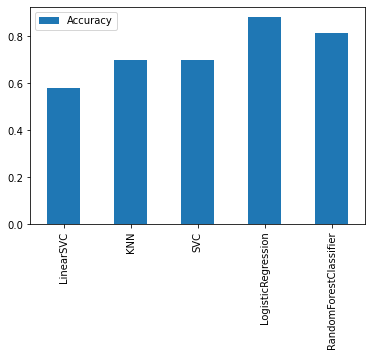

In [59]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), # data
                          results.keys(), # index
                          columns=['Accuracy'])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()

`LogisticRegression` performed best when using `np.random.seed(42)`.

Let's tune its hyperparameters and see if we can improve it.

#### Hyperparameter Tuning

